# Merging Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from scipy import integrate
import warnings


plt.style.use('ggplot')

In [4]:
#variable and file names
melb = 'monthly_rain','max_temp','min_temp'
melb_wide = ['data/monthly_rain_wide','data/max_temp_wide','data/min_temp_wide']
file_names = ["data/MelbourneRainfall.csv","data/MelbourneMaxTemp.csv","data/MelbourneMinTemp.csv"]

#loop for wide dataframes
for i in range(3):
    globals()[melb_wide[i]] = pd.read_csv(file_names[i],names = ['Product code', 'Station Number','Year',1,2,3,4,5,6,7,8,9,10,11,12,'Annual'])

#loop for melted dataframes
for i in range(3):
    globals()[melb[i]] = globals()[melb_wide[i]].set_index('Year').rename_axis('Month', axis=1).melt(value_vars=[1,2,3,4,5,6,7,8,9,10,11,12], ignore_index=False).rename({'value': melb[i]}, axis=1).reset_index(level=['Year'])
    globals()[melb[i]] = globals()[melb[i]][globals()[melb[i]]['Year']!='Year'].reset_index().drop('index',axis=1)
    globals()[melb[i]]['Year'] = pd.to_numeric(globals()[melb[i]]['Year'])


In [5]:
#variable and file names
drivers = ['dmi','newsam','nino','soi']
drivers_wide = ['data/dmi_wide','data/newsam_wide','data/nino_wide','data/soi_wide']
file_names = ['data/dmi.had.long.data.txt','data/newsam.1957.2007.txt','data/nino34.long.anom.data.txt','data/soi.txt']

#loop for wide dataframes
for i in range(4):
    globals()[drivers_wide[i]]=pd.read_csv(file_names[i], names = ['Year',1,2,3,4,5,6,7,8,9,10,11,12],delim_whitespace=True)
    
#loop for melted dataframes
for i in range(4):
    globals()[drivers[i]] = globals()[drivers_wide[i]].set_index('Year').rename_axis('Month', axis=1).melt(value_vars=[1,2,3,4,5,6,7,8,9,10,11,12], ignore_index=False).rename({'value': drivers[i]}, axis=1).reset_index(level=['Year'])
    if type(globals()[drivers[i]].iloc[0,1])!=np.float64:
        globals()[drivers[i]] = globals()[drivers[i]].iloc[1: , :]
        globals()[drivers[i]] = globals()[drivers[i]][globals()[drivers[i]]['Year']!='YEAR'].reset_index().drop('index',axis=1)
    globals()[drivers[i]]['Year'] = pd.to_numeric(globals()[drivers[i]]['Year'])

In [6]:
#merge dataframes
melb_weather = pd.merge(monthly_rain, max_temp,how='left').merge(min_temp,how='left').merge(dmi,how='left').merge(newsam,how='left').merge(nino,how='left').merge(soi,how='left').dropna(axis=0).reset_index().drop('index',axis=1)


#make all values the same data type
for i in ['Month','monthly_rain','max_temp','min_temp','newsam','soi']:
    melb_weather[i] = pd.to_numeric(melb_weather[i])

melb_weather

,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
0,1957,1,6.8,25.8,11.8,-0.371,-0.87,-0.56,0.6
1,1958,1,13.1,23.6,13.0,-0.331,0.04,1.54,-1.9
2,1959,1,13.9,29.5,15.8,0.038,1.59,0.43,-0.9
3,1960,1,45.8,28.8,16.1,-0.171,0.90,0.02,0.1
4,1961,1,33.6,29.4,16.6,-0.079,0.91,-0.15,-0.3
...,...,...,...,...,...,...,...,...,...
762,2016,12,39.6,25.5,14.6,-0.241,-1.52,-0.51,0.3
763,2017,12,128.4,25.0,15.2,0.179,1.44,-0.85,-0.1
764,2018,12,104.8,25.7,16.0,0.379,1.44,0.97,1.0
765,2019,12,6.2,24.6,14.0,0.312,-1.78,0.51,-0.6


In [7]:
melb_weather['Year']=melb_weather['Year'].map(str)
melb_weather['Month']=melb_weather['Month'].map(str)
melb_weather["Date"] = melb_weather["Year"]+ '-'+melb_weather["Month"]
melb_weather['Date'] = pd.to_datetime(melb_weather['Date'],format='%Y-%m')
melb_weather = melb_weather.sort_values(by="Date")
melb_weather = melb_weather[['Date','Year','Month','monthly_rain','max_temp','min_temp','dmi','newsam','nino','soi']].reset_index().drop('index',axis=1)
melb_weather

,Date,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
0,1957-01-01,1957,1,6.8,25.8,11.8,-0.371,-0.87,-0.56,0.6
1,1957-02-01,1957,2,30.0,25.9,13.7,-0.484,-2.27,-0.24,-0.1
2,1957-03-01,1957,3,37.4,23.4,11.8,-0.097,0.07,0.08,0.2
3,1957-04-01,1957,4,29.4,20.7,10.1,-0.225,-1.97,0.42,0.2
4,1957-05-01,1957,5,44.2,16.8,8.0,-0.247,-2.50,0.45,-0.7
...,...,...,...,...,...,...,...,...,...,...
762,2020-08-01,2020,8,61.6,15.1,7.6,-0.070,-2.20,-0.42,1.1
763,2020-09-01,2020,9,33.6,18.1,9.8,-0.084,-0.25,-0.66,0.9
764,2020-10-01,2020,10,74.2,19.1,10.9,0.233,1.79,-1.19,0.5
765,2020-11-01,2020,11,48.8,24.5,14.0,0.143,1.14,-1.01,0.7


### EDA by Stephanie

There are no missing values in the respective columns so there is no need to drop or add anything.

In [8]:
melb_weather.isnull().sum()

Date            0
Year            0
Month           0
monthly_rain    0
max_temp        0
min_temp        0
dmi             0
newsam          0
nino            0
soi             0
dtype: int64

In [9]:
print('Number of times it rained: '+str(len(melb_weather.index.unique())))
print('Number of months it rained when temp was < than 8 degrees:' +str(len(melb_weather[melb_weather['monthly_rain']<8.0].index.unique())))
print('times it rained at temp greater than 23.4 degrees: ' +str(len(melb_weather[melb_weather['monthly_rain']<=23.4].index.unique())))
print('chances of rain  : ' +str(round(100*len(melb_weather[melb_weather['monthly_rain']>6.8].index.unique()) /
                              len(melb_weather.index.unique()),1)) + '%')
print()

display.display(melb_weather.info(show_counts=1))
display.display(melb_weather.describe())
melb_weather.shape

Number of times it rained: 767
Number of months it rained when temp was < than 8 degrees:20
times it rained at temp greater than 23.4 degrees: 133
chances of rain  : 98.2%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          767 non-null    datetime64[ns]
 1   Year          767 non-null    object        
 2   Month         767 non-null    object        
 3   monthly_rain  767 non-null    float64       
 4   max_temp      767 non-null    float64       
 5   min_temp      767 non-null    float64       
 6   dmi           767 non-null    float64       
 7   newsam        767 non-null    float64       
 8   nino          767 non-null    float64       
 9   soi           767 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 60.0+ KB


None

,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,51.650326,20.282529,11.224250,-0.013824,0.039648,-0.006102,0.106910
std,32.076314,4.502626,3.232971,0.352919,1.787256,0.825724,0.941537
min,0.500000,12.700000,4.600000,-1.197000,-7.650000,-2.180000,-3.600000
25%,29.200000,16.300000,8.300000,-0.239500,-1.135000,-0.530000,-0.500000
50%,46.400000,20.400000,11.000000,-0.026000,0.090000,-0.060000,0.100000
75%,66.800000,24.250000,13.900000,0.208500,1.330000,0.480000,0.700000
max,238.200000,30.100000,18.600000,1.402000,4.920000,2.570000,2.900000


(767, 10)

### Checking correlation

In [10]:
correlations = melb_weather.corr()
print(correlations)

              monthly_rain  max_temp  min_temp       dmi    newsam      nino  \
monthly_rain      1.000000 -0.081971 -0.023990 -0.198665  0.087883 -0.125015   
max_temp         -0.081971  1.000000  0.967701  0.120187  0.008774  0.006564   
min_temp         -0.023990  0.967701  1.000000  0.118226  0.027552 -0.021607   
dmi              -0.198665  0.120187  0.118226  1.000000  0.088953  0.269421   
newsam            0.087883  0.008774  0.027552  0.088953  1.000000 -0.068315   
nino             -0.125015  0.006564 -0.021607  0.269421 -0.068315  1.000000   
soi               0.130630  0.031827  0.069749 -0.185966  0.067021 -0.726037   

                   soi  
monthly_rain  0.130630  
max_temp      0.031827  
min_temp      0.069749  
dmi          -0.185966  
newsam        0.067021  
nino         -0.726037  
soi           1.000000  


Lets look at the correlation on a heatmap, this will make it easier to understand.

Text(0.5, 1.0, 'Correlation Heatmap')

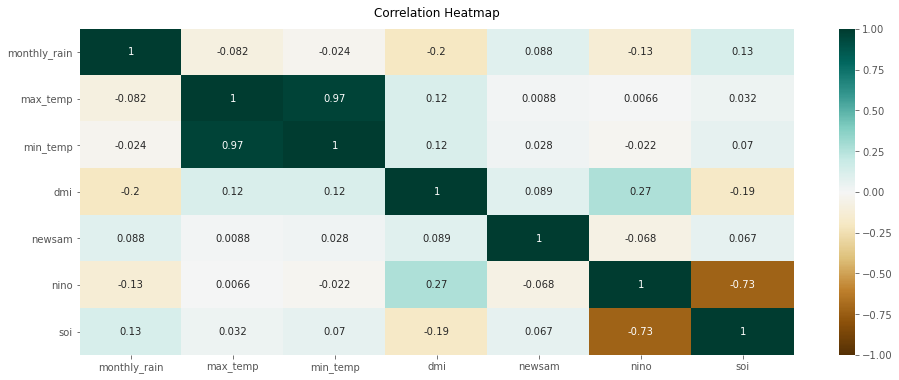

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(melb_weather.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

As we can see it is now easier to tell that max_temp and min_temp are strongly correlated while nino and soi are not. However, other than that this heatmap does not really tell us anything.

#### Checking outliers

As part of exploratory data analysis, we checked for outliers. This was done by using the ‘seaborn’ library and the ‘boxplot’ function. In addition to that, the highest and lowest points of the variables with outliers were outlined. 

In [18]:
palette1= sns.diverging_palette(257, 255, s=300, l=50, n=14)

<AxesSubplot:xlabel='Month', ylabel='max_temp'>

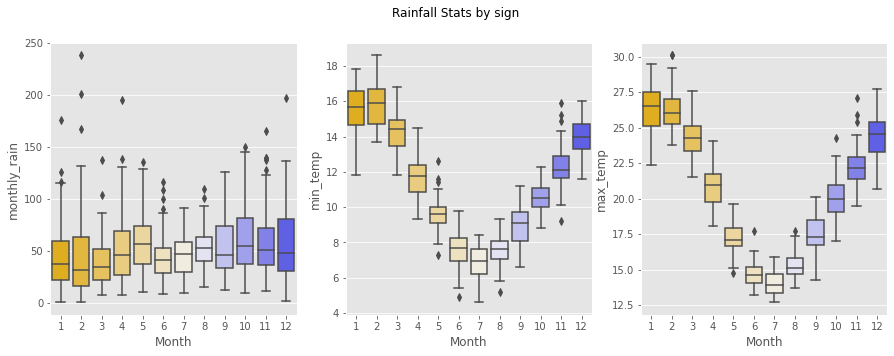

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

fig.suptitle('Rainfall Stats by sign')

sns.boxplot(ax=axes[0], data=melb_weather, x='Month', y='monthly_rain',palette=palette1)
sns.boxplot(ax=axes[1], data=melb_weather, x='Month', y='min_temp',palette=palette1)
sns.boxplot(ax=axes[2], data=melb_weather, x='Month', y='max_temp',palette=palette1)

<AxesSubplot:xlabel='Month', ylabel='soi'>

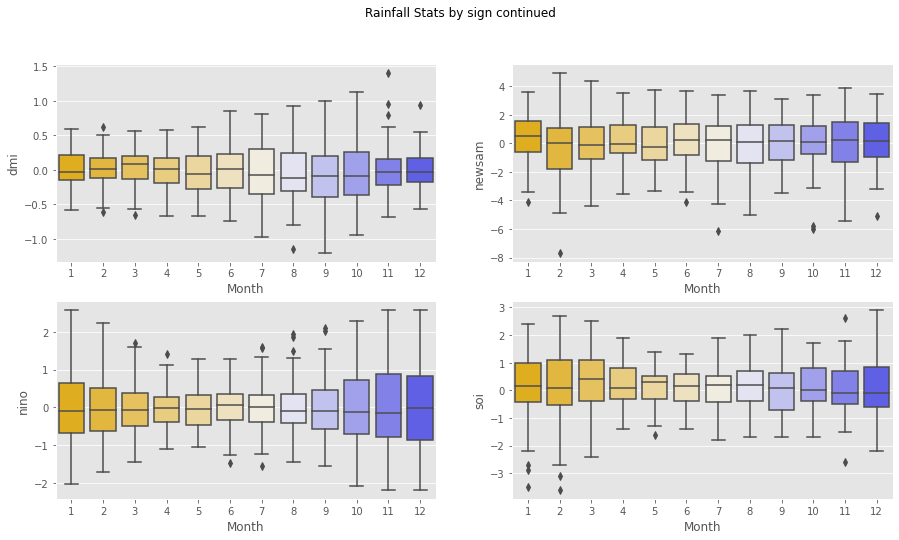

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

fig.suptitle('Rainfall Stats by sign continued')

sns.boxplot(ax=axes[0,0], data=melb_weather, x='Month', y='dmi',palette=palette1)
sns.boxplot(ax=axes[0,1], data=melb_weather, x='Month', y='newsam',palette=palette1)
sns.boxplot(ax=axes[1,0], data=melb_weather, x='Month', y='nino',palette=palette1)
sns.boxplot(ax=axes[1,1], data=melb_weather, x='Month', y='soi',palette=palette1)

In [14]:
percentile25 = melb_weather['monthly_rain'].quantile(0.25)
percentile75 = melb_weather['monthly_rain'].quantile(0.75)

In [15]:
IQR= Q3-Q1
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

NameError: name 'Q3' is not defined

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(melb_weather['dmi'])
plt.subplot(1,2,2)
sns.distplot(melb_weather['nino'])

In [ ]:
# plt.figure(2, 2, figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(df['cgpa'])
# plt.subplot(1,2,2)
# sns.distplot(df['placement_exam_marks'])
# plt.show()

In [37]:
print("Highest allowed for nino:",melb_weather['nino'].mean() + 3*melb_weather['nino'].std())
print("Lowest allowed for nino:",melb_weather['nino'].mean() - 3*melb_weather['nino'].std())
print("Highest allowed for dmi:" ,melb_weather['dmi'].mean() + 3*melb_weather['dmi'].std())
print("Lowest allowed for dmi:",melb_weather['dmi'].mean() - 3*melb_weather['dmi'].std())
print("Highest allowed for monthly rain:" ,melb_weather['monthly_rain'].mean() + 3*melb_weather['monthly_rain'].std())
print("Lowest allowed for monthly rain:",melb_weather['monthly_rain'].mean() - 3*melb_weather['monthly_rain'].std())
print("Highest allowed for newsam:" ,melb_weather['newsam'].mean() + 3*melb_weather['newsam'].std())
print("Lowest allowed for newsam:",melb_weather['newsam'].mean() - 3*melb_weather['newsam'].std())

Highest allowed for nino: 2.4710717966520956
Lowest allowed for nino: -2.4832751864826044
Highest allowed for dmi: 1.0449339242309779
Lowest allowed for dmi: -1.0725819033704824
Highest allowed for monthly rain: 147.87926665291727
Lowest allowed for monthly rain: -44.57861476243485
Highest allowed for newsam: 5.401416476185314
Lowest allowed for newsam: -5.322120517906304


In [34]:
melb_weather[(melb_weather['nino'] > -2.48) | (melb_weather['nino'] < 2.47)]

,Date,Year,Month,monthly_rain,max_temp,min_temp,dmi,newsam,nino,soi
0,1957-01-01,1957,1,6.8,25.8,11.8,-0.371,-0.87,-0.56,0.6
1,1957-02-01,1957,2,30.0,25.9,13.7,-0.484,-2.27,-0.24,-0.1
2,1957-03-01,1957,3,37.4,23.4,11.8,-0.097,0.07,0.08,0.2
3,1957-04-01,1957,4,29.4,20.7,10.1,-0.225,-1.97,0.42,0.2
4,1957-05-01,1957,5,44.2,16.8,8.0,-0.247,-2.50,0.45,-0.7
...,...,...,...,...,...,...,...,...,...,...
762,2020-08-01,2020,8,61.6,15.1,7.6,-0.070,-2.20,-0.42,1.1
763,2020-09-01,2020,9,33.6,18.1,9.8,-0.084,-0.25,-0.66,0.9
764,2020-10-01,2020,10,74.2,19.1,10.9,0.233,1.79,-1.19,0.5
765,2020-11-01,2020,11,48.8,24.5,14.0,0.143,1.14,-1.01,0.7


As seen, there are 4 variables with outliers, namely monthly_rain,nino,newsam and soi. 
These outliers value needs to be handled and there are several ways of handling them:
    Drop the outlier value
    Replace the outlier value using the IQR
However, this dataset is relatively small as it has only 767 entries therefore, we will not attempt to remove the outliers. This ensures that there is enough data to model. 

###    Removing outliers


In [ ]:
def remove_outlier(col):
    sorted(col)
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    return lower_bound,upper_bound 

remove_outlier(nino)


In [ ]:
Q1 = melb_weather.quantile(0.25)
Q3 = melb_weather.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
lowrain, highrain = remove_outlier(melb_weather['monthly_rain'])
melb_weather['monthly_rain']=np.where(melb_weather['monthly_rain']>highrain,highrain,melb_weather['monthly_rain'])
melb_weather['monthly_rain']=np.where(melb_weather['monthly_rain']<lowrain,lowrain,melb_weather['monthly_rain'])


lownino, highnino= remove_outlier(melb_weather['nino'])
melb_weather['nino']=np.where(melb_weather['nino']>highnino,highnino,melb_weather['nino'])
melb_weather['nino']=np.where(melb_weather['nino']<lownino,lownino,melb_weather['nino'])

lowsoi, highsoi= remove_outlier(melb_weather['soi'])
melb_weather['soi']=np.where(melb_weather['soi']>highsoi,highsoi,melb_weather['soi'])
melb_weather['soi']=np.where(melb_weather['soi']<lowsoi,lowsoi,melb_weather['soi'])


lownewsam, highnewsam= remove_outlier(melb_weather['newsam'])
melb_weather['newsam']=np.where(melb_weather['newsam']>highnewsam,highnewsam,melb_weather['newsam'])
melb_weather['newsam']=np.where(melb_weather['newsam']<lownewsam,lownewsam,melb_weather['newsam'])

After removing the outliers we plot the boxplots again to see if the number of outliers have decreased in the graphs below

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

fig.suptitle('Rainfall Stats by sign')

sns.boxplot(ax=axes[0], data=melb_weather, x='Month', y='monthly_rain')
sns.boxplot(ax=axes[1], data=melb_weather, x='Month', y='min_temp')
sns.boxplot(ax=axes[2], data=melb_weather, x='Month', y='max_temp')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Rainfall Stats by sign continued')

sns.boxplot(ax=axes[0,0], data=melb_weather, x='Month', y='dmi')
sns.boxplot(ax=axes[0,1], data=melb_weather, x='Month', y='newsam')
sns.boxplot(ax=axes[1,0], data=melb_weather, x='Month', y='nino')
sns.boxplot(ax=axes[1,1], data=melb_weather, x='Month', y='soi')


fig, axes = plt.subplots(2, 4, figsize=(18, 10))
The graphs show that most outliers have been removed however some still do remain. 

In [ ]:

fig, axes = plt.subplots(2, 2,sharex=True, figsize=(10,5))
sns.distplot[ax=axes[0,0],melb_weather['dmi']]
sns.distplot[ax=axes[0,1],melb_weather['newsam']]
sns.distplot[ax=axes[1,0],melb_weather['nino']]
sns.distplot[ax=axes[1,1],melb_weather['soi']]